In [40]:
from tensorflow.python.keras import models, layers, optimizers
import tensorflow as tf
from tensorflow.keras.preprocessing.text import Tokenizer, text_to_word_sequence
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder
from tensorflow import keras
from sklearn.metrics import confusion_matrix

In [147]:
df = pd.read_csv("dataset/Results_EESCES 2020_20200914_small.csv",encoding='latin-1', header=4)
pd.set_option('display.max_columns', None) # Display all columns
df

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,NIK,Nama,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,1.196481e+10,391884984.0,2020-09-07 1:31,2020-09-07 2:21,114.4.82.137,BUDIHARI.S@METRA.CO.ID,805649.0,Budi Hari Setiawan,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,1.196481e+10,391884984.0,2020-09-07 1:32,2020-09-07 2:49,180.253.226.26,anna.damayanti@sigma.co.id,785628.0,ANNA FRANSISCA DAMAYANTI,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,1.196481e+10,391884984.0,2020-09-07 1:33,2020-09-07 1:54,182.1.169.184,rachmadian_fatroni@telkomsel.co.id,754022.0,RACHMADIAN FATRONI,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,

In [148]:
# df[df['Respondent ID'].isna()]
# df.drop(df[df['Respondent ID'].isna()])
df = df.drop(df[df['Respondent ID'].isna()].index)
df

,Respondent ID,Collector ID,Start Date,End Date,IP Address,Email Address,NIK,Nama,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Tahun Lahir,Umur,Mulai Kerja,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,Open-Ended Response,Open-Ended Response.1,CES-RE135,Open-Ended Response.2,Open-Ended Response.3,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,1.196481e+10,391884984.0,2020-09-07 1:31,2020-09-07 2:21,114.4.82.137,BUDIHARI.S@METRA.CO.ID,805649.0,Budi Hari Setiawan,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1980-04-26,41.0,2014-04-07,6,Gen X,PRIA,Jakarta,Jawa,"Fasilitas, keamanan, kenyamanan",Kejelasan dan transparasi terkait dengan karir,Tidak,Over all sudah baik,Kemudahan menghubungi HC helpdesk,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,NaN,NaN,NaN,NaN,NaN,0,0
1,1.196481e+10,391884984.0,2020-09-07 1:32,2020-09-07 2:49,180.253.226.26,anna.damayanti@sigma.co.id,785628.0,ANNA FRANSISCA DAMAYANTI,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,1978-09-07,42.0,2014-05-01,6,Gen X,WANITA,Jakarta,Jawa,Fasilitas kerja,Reward dan Bonus,Tidak,email blast,blasting information,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,1.196481e+10,391884984.0,2020-09-07 1:33,2020-09-07 1:54,182.1.169.184,rachmadian_fatroni@telkomsel.co.id,754022.0,RACHMADIAN FATRONI,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,1975-10-11,45.0,2001-06-25,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Digitalisasi sistem & Flexible time for work,"Pengembangan karir, kesejahteraan karyawan, si...",Tidak,Informasi yang disampaikan cukup jelas,Lebih update & cepat,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,

In [170]:
# df
df.isna().sum()

Divisi                0
Company               6
BP                    0
Level Company         0
CFU FU Outdated       0
                     ..
Employee Group        0
Employee Subgroup     0
Level Pendidikan      0
Short Job Function    0
Short Job Family      0
Length: 86, dtype: int64

In [5]:
# df['Tahun Lahir'] = pd.to_datetime(df['Tahun Lahir'])
# df['Umur'] = df['Umur'].astype(int)
df['Mulai Kerja'] = pd.to_datetime(df['Mulai Kerja'], errors='coerce')
# df['Durasi Kerja'] = df['Durasi Kerja'].astype(int)

In [169]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 86 columns):
 #   Column                               Non-Null Count  Dtype  
---  ------                               --------------  -----  
 0   Divisi                               5636 non-null   object 
 1   Company                              5630 non-null   object 
 2   BP                                   5636 non-null   object 
 3   Level Company                        5636 non-null   object 
 4   CFU FU Outdated                      5636 non-null   object 
 5   CFU FU                               5636 non-null   object 
 6   HCBP                                 5636 non-null   object 
 7   Umur                                 5636 non-null   float64
 8   Durasi Kerja                         5636 non-null   object 
 9   Generasi                             5636 non-null   object 
 10  Jenis Kelamin                        5636 non-null   object 
 11  PSA                           

In [154]:
# backup
full_df = df

In [155]:
# df[['Tahun Lahir', 'Mulai Kerja']]
df = df.drop(df.columns[0:8], axis=1)

In [156]:
df = df.drop(['Tahun Lahir', 'Mulai Kerja'], axis=1)

In [157]:
df = df.drop(df.columns[13:15], axis=1) #drop open ended response 1

In [158]:
df = df.drop(df.columns[14:16], axis=1) #drop open ended response 2

In [168]:
df.head(5)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,CES-RE135,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,PT. MULTIMEDIA NUSANTARA,PT. MULTIMEDIA NUSANTARA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,41.0,6,Gen X,PRIA,Jakarta,Jawa,Tidak,86.666667,86.666667,100.0,84.0,70.0,80.0,75.0,75.0,80.0,60.0,60.0,80.0,80.0,80.0,100.0,80.0,80.0,80.0,80.0,80.0,60.0,100.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,60.0,73.333333,80.0,100.0,80.0,80.0,80.0,100.0,100.0,100.0,100.0,91.111111,76.8,Highly Engaged,Highly Engaged,85.0,80.0,80.0,80.0,86.776789,90.0,68.0,82.520648,77.777778,76.0,81.666667,75.000000,63.333333,73.333333,77.407940,0.608779,0.845447,0,0,0,0,0,0,0
1,PT. SIGMA CIPTA CARAKA,PT. SIGMA CIPTA CARAKA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,42.0,6,Gen X,WANITA,Jakarta,Jawa,Tidak,60.000000,80.000000,80.0,80.0,70.0,76.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,80.0,70.000000,60.0,60.0,60.0,80.0,80.0,80.0,80.0,80.0,80.0,73.333333,77.2,Moderately Engaged,Moderately Engaged,80.0,75.0,80.0,80.0,86.776789,80.0,80.0,80.020648,80.000000,80.0,75.000000,65.000000,48.333333,62.777778,75.699606,0.419913,0.814697,Katholik,menikah,Karyawan Tetap,Aktif Normal,S1,1.2 DIGITAL PLATFORM AND IT,1. DIGITAL TECHNOLOGY
2,PT. TELKOMSEL,PT. TELKOMSEL,IV,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,45.0,19,Gen X,PRIA,BALIKPAPAN,Kalimantan,Tidak,80.000000,60.000000,80.0,64.0,70.0,60.0,65.0,65.0,60.0,60.0,40.0,40.0,40.0,80.0,60.0,80.0,40.0,80.0,60.0,80.0,60.0,80.0,40.0,60.0,60.0,60.0,60.0,80.0,60.0,60.0,80.0,60.0,60.0,60.0,53.333333,80.0,80.0,80.0,60.0,60.0,60.0,80.0,80.0,80.0,73.333333,64.8,Moderately Engaged,Moderately Engaged,55.0,65.0,55.0,80.0,86.776789,70.0,60.0,65.020648,64.444444,68.0,80.000000,73.333333,61.666667,71.666667,67.282940,0.679736,0.713797,islam,menikah,Karyawan Tetap,Aktif Normal,S1,0,0
3,PT. METRA DIGITAL MEDIA,PT. METRA DIGITAL MEDIA,V,AP,CFU-ENTERPRISE,CFU-ENTERPRISE,HCBP 2,37.0,2,Senior Millennial,PRIA,Jakarta,Jawa,Iya,40.000000,26.666667,60.0,72.0,70.0,28.0,50.0,45.0,40.0,40.0,20.0,60.0,20.0,40.0,80.0,80.0,60.0,80.0,60.0,60.0,80.0,40.0,20.0,20.0,20.0,40.0,60.0,20.0,60.0,60.0,20.0,60.0,60.0,40.0,36.666667,20.0,60.0,40.0,20.0,40.0,20.0,60.0,60.0,60.0,42.222222,53.0,Passive,Disengaged,55.0,55.0,55.0,60.0,60.000000,60.0,32.0,56.250000,44.444444,52.0,58.333333,58.333333,48.333333,55.000000,51.923611,1.007725,0.761957,islam,menikah,Karyawan Tetap,Aktif Normal,S1,1.3 DIGITAL SERVICE,1. DIGITAL TECHNOLOGY
4,PT. TELKOMSEL,PT. TELKOMSEL,V,AP,CFU-MOBILE,CFU-MOBILE,HCBP 1,28.0,3,Junior Millennial,PRIA,Jakarta,Jawa,Tidak,86.666667,66.666667,80.0,80.0,90.0,80.0,85.0,80

In [167]:
# fill na to zeros
df[df.columns[79:]] = df[df.columns[79:]].fillna(0)

In [171]:
#Decode object to int
obj_col = df.select_dtypes(['object','float64']).columns
# obj_col
df[obj_col] = df[obj_col].apply(lambda x: pd.factorize(x)[0]) #Convert object data to int (decode)
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 86 columns):
 #   Column                               Non-Null Count  Dtype
---  ------                               --------------  -----
 0   Divisi                               5636 non-null   int64
 1   Company                              5636 non-null   int64
 2   BP                                   5636 non-null   int64
 3   Level Company                        5636 non-null   int64
 4   CFU FU Outdated                      5636 non-null   int64
 5   CFU FU                               5636 non-null   int64
 6   HCBP                                 5636 non-null   int64
 7   Umur                                 5636 non-null   int64
 8   Durasi Kerja                         5636 non-null   int64
 9   Generasi                             5636 non-null   int64
 10  Jenis Kelamin                        5636 non-null   int64
 11  PSA                                  5636 non-null   int

In [172]:
df.head(4)

,Divisi,Company,BP,Level Company,CFU FU Outdated,CFU FU,HCBP,Umur,Durasi Kerja,Generasi,Jenis Kelamin,PSA,Pulau,CES-RE135,EES-DEI-Say,EES-DEI-Stay,EES-DEI-Strive,EES-DWI-Agility,EES-DWI-EngagingLeadership,EES-DWI-Talent Focus,EES-DWI-The Work,EES-DWI-The Basic,EES-SB-Agility,EES-SB-Engaging Leadership,EES-SB-Talent Focus,EES-SB-The Work,EES-SB-The Basic,EES-SB-Overall Satisfaction,EES-Bobot-AG1,EES-Bobot-AG2,EES-Bobot-AG3,EES-Bobot-AG4,EES-Bobot-AG5,EES-Bobot-EL1,EES-Bobot-EL2,EES-Bobot-TF1,EES-Bobot-TF2,EES-Bobot-TF3,EES-Bobot-TF4,EES-Bobot-TF5,EES-Bobot-TW1,EES-Bobot-TW2,EES-Bobot-TW3,EES-Bobot-TW4,EES-Bobot-TB1,EES-Bobot-TB2,EES-Bobot-TB3,EES-Bobot-TB4,EES-S-Overal Satisfaction Index,EES-Bobot-SA1,EES-Bobot-SA2,EES-Bobot-SA3,EES-Bobot-ST1,EES-Bobot-ST2,EES-Bobot-ST3,EES-Bobot-SR1,EES-Bobot-SR2,EES-Bobot-SR3,EES Index,Workexperience Index,Level Engagement,Level Engagement 2,CES-RE-Horizontal Communicatioin,CES-RE-Top Management Communication,CES-RE-Supervisory Communication,CES-RE-Diagonal Communication,CES-RE-Subordinate Communication,CES-IN-Corporate Information,CES-IN-Organizational Information,CES-Dimensi Relational,CES-Dimensi Informational,CES-Dimensi Communication Climate,CES-EM1-Manfaat,CES-EM2-Kemudahan,CES-EM3-Frekuensi,CES-Dimensi Efektivitas Media,CES Index,Deviasi EES,Deviasi CES,Agama,Marital,Employee Group,Employee Subgroup,Level Pendidikan,Short Job Function,Short Job Family
0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0,0
1,1,1,0,0,0,0,0,1,0,0,1,0,0,0,1,1,1,1,0,1,1,1,1,0,0,0,0,0,1,0,0,0,0,1,1,1,1,0,1,0,0,1,0,0,0,0,0,1,1,1,1,1,0,0,1,1,1,1,1,1,1,1,1,1,0,0,0,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1,1
2,2,2,1,0,1,1,1,2,1,0,0,1,1,0,2,2,1,2,0,2,2,2,1,0,1,1,1,0,2,0,1,0,1,0,0,1,2,1,1,1,1,1,1,1,0,1,1,0,2,0,2,0,1,1,2,1,1,1,1,2,1,1,2,2,1,0,0,2,2,2,2,2,2,2,2,2,2,2,2,2,1,1,1,1,0,0
3,3,3,0,0,0,0,0,3,2,1,0,0,0,1,3,3,2,3,0,3,3,3,2,1,2,2,2,1,1,0,2,0,1,1,1,2,3,2,2,2,1,2,1,1,1,1,1,2,3,2,1,2,2,2,3,2,2,2,2,3,2,2,2,3,1,1,1,3,3,3,3,3,3,3,1,3,3,3,3,2,1,1,1,1,2,1


Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

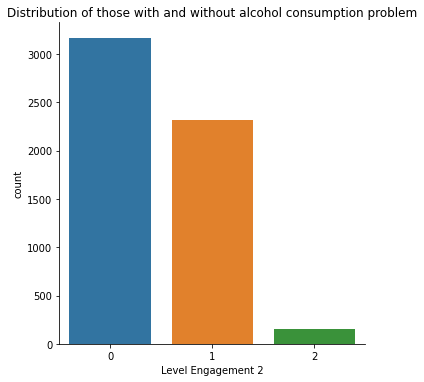

In [13]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Level Engagement 2", kind="count", data=df)
plt.title('Distribution of those with and without alcohol consumption problem')

In [14]:
df['Level Engagement 2'].value_counts()

0    3170
1    2316
2     150
Name: Level Engagement 2, dtype: int64

Drop class 2, because of small data

In [15]:
df = df.drop(df[df['Level Engagement 2']==2].index)

Text(0.5, 1.0, 'Distribution of those with and without alcohol consumption problem')

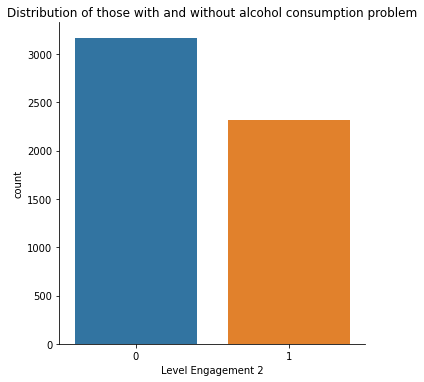

In [16]:
import seaborn as sns
import matplotlib.pyplot as plt

sns.catplot(x="Level Engagement 2", kind="count", data=df)
plt.title('Distribution of those with and without alcohol consumption problem')

In [100]:
pd.set_option('display.max_rows', None) # Display all rows

In [101]:
# Correlation
df.corrwith(df['Level Engagement 2']).sort_values(ascending=False)

Level Engagement                       1.000000
Level Engagement 2                     1.000000
EES-Bobot-SR2                          0.701928
EES-Bobot-SR3                          0.697555
EES-Bobot-SR1                          0.671108
EES-Bobot-SA2                          0.578365
EES-Bobot-TF1                          0.514839
EES-Bobot-ST3                          0.493663
EES-Bobot-AG1                          0.358017
EES-DEI-Strive                         0.203642
Generasi                               0.196082
Jenis Kelamin                          0.128363
Deviasi EES                            0.095157
Deviasi CES                            0.032115
Company                                0.023265
CES-Dimensi Efektivitas Media         -0.011612
HCBP                                  -0.022273
CES Index                             -0.028751
CFU FU Outdated                       -0.029073
CES-IN-Corporate Information          -0.038236
CES-EM1-Manfaat                       -0

In [98]:
df['Level Engagement 2'].value_counts()

0    3170
1    2316
Name: Level Engagement 2, dtype: int64

In [105]:
y = df['Level Engagement 2']
y

0       0
1       1
2       1
4       1
5       0
6       1
7       1
8       0
9       1
10      1
11      0
12      1
13      1
14      1
15      0
17      1
18      1
19      1
20      1
21      1
22      1
23      1
24      1
25      1
26      0
27      0
28      1
29      0
30      0
31      0
32      1
33      1
34      1
35      0
36      1
37      0
38      1
39      1
40      1
41      0
42      1
43      1
44      0
45      1
46      0
47      0
48      0
49      1
50      1
51      1
52      1
54      1
55      0
56      0
57      0
58      0
59      0
60      1
61      1
62      0
63      1
64      0
65      1
66      0
68      1
69      1
70      0
71      0
72      0
73      0
74      1
75      1
76      1
77      1
78      1
79      1
80      1
81      0
82      1
83      0
84      1
85      1
86      0
87      0
88      0
89      0
90      0
91      1
92      0
93      0
94      0
95      1
96      0
97      0
98      1
99      1
100     1
101     0
102     1
103     1


In [106]:
from sklearn.preprocessing import LabelEncoder

encoder = LabelEncoder()
encoder.fit(y)
y = encoder.transform(y)
y

array([0, 1, 1, ..., 1, 0, 0], dtype=int64)

In [107]:
X = df
X = X.drop(['Level Engagement 2','Level Engagement'], axis=1)
X = X.values

In [108]:
scaler = StandardScaler()
scaler.fit(X)
X = scaler.transform(X)

In [109]:
X.min()

-4.866874985100169

### Splitting Data

In [110]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)

In [111]:
class_names=['Highly Engaged', 'Moderately Engaged']

In [112]:
#checking the shape of the training set and test set
print("Training set - Features: ", X_train.shape, "Target: ", y_train.shape,)
print("Test set - Features: ", X_test.shape, "Target: ",y_test.shape,)
# print(y_train.value_counts(normalize = True))
# print(y_test.value_counts(normalize = True))

Training set - Features:  (3085, 77) Target:  (3085,)
Test set - Features:  (1372, 77) Target:  (1372,)


In [113]:
X_train.max()

6.571158685160943

### Class Imbalance

In [114]:
# separate minority and majority classes
highly_engaged = df[df['Level Engagement 2']==0]
moderately_engaged = df[df['Level Engagement 2']==1]

# Get a class count to understand the class imbalance.
print('Highly Engaged count: '+ str(len(highly_engaged)))
print('Moderately Engaged count: '+ str(len(moderately_engaged)))

Highly Engaged count: 3170
Moderately Engaged count: 2316


In [115]:
from sklearn.utils import resample

In [116]:
# upsample minority: alcohol problem
moderately_engaged_upsampled = resample(moderately_engaged,
                          replace=True, # sample with replacement
                          n_samples=len(highly_engaged), # match number in majority class
                          random_state=22) # reproducible results
moderately_engaged_upsampled.shape

(3170, 79)

In [117]:
# combine majority and upsampled minority
upsampled = pd.concat([highly_engaged, moderately_engaged_upsampled])
# upsampled
# check new class counts
upsampled['Level Engagement 2'].value_counts()

1    3170
0    3170
Name: Level Engagement 2, dtype: int64

In [118]:
y_train_up = upsampled['Level Engagement 2']
X_train_up = upsampled.drop(columns = 'Level Engagement 2', axis=1)
X_train_up.shape

# print(y_train_u.value_counts(normalize = True))
# print(X_train_u.value_counts(normalize = True))

(6340, 78)

In [119]:
# encoder = LabelEncoder()
# encoder.fit(y_train_up)
# y_train_up = encoder.transform(y_train_up)
# y_train_up

In [120]:
# scaler = StandardScaler()
# scaler.fit(X_train_up)
# X_train_up = scaler.transform(X_train_up)
# X_train_up

In [123]:
# print(X_train_up.max())
print(y_train_up.max())

1


### Resplit Data

In [124]:
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=22)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

In [125]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [126]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [129]:
print(X_train.min())
print(y_train.min())

-4.8860432384399735
0


In [130]:
# Testing

unique, counts = np.unique(y_valid, return_counts=True)
dict(zip(unique, counts))

{0: 578, 1: 611}

In [131]:
X_train

array([[-0.82375874, -0.22492871,  1.33111543, ...,  2.04300034,
        -1.0718185 , -0.14847691],
       [ 0.43411303, -0.34651364,  0.68678835, ...,  1.17027923,
         1.66329347,  1.41088103],
       [-0.31274833, -0.34651364, -1.2461929 , ...,  1.48322468,
         0.1309717 , -0.24629118],
       ...,
       [ 0.6306555 , -0.34651364,  1.97544252, ..., -0.77240678,
        -0.11617697, -0.6786586 ],
       [-0.19482286, -0.34651364, -0.60186582, ...,  0.6336439 ,
        -0.47866169,  0.91755688],
       [-0.82375874, -0.22492871,  1.97544252, ...,  0.7460398 ,
         1.00423034, -1.25136825]])

In [174]:
# from keras.utils import to_categorical 

# scaler = StandardScaler()
# X_train = scaler.fit_transform(X_train)
# X_valid = scaler.transform(X_valid)
# X_test = scaler.transform(X_test)

In [ ]:
# y_train=to_categorical(y_train)
# y_test=to_categorical(y_test)
# y_valid=to_categorical(y_valid)

In [175]:
# from sklearn.preprocessing import LabelEncoder

# encoder = LabelEncoder()
# encoder.fit(y_train)
# y_train = encoder.transform(y_train)
# y_test = encoder.transform(y_test)
# y_valid = encoder.transform(y_valid)

In [132]:
y_train

array([1, 1, 1, ..., 1, 1, 0], dtype=int64)

In [93]:
# y_train = np.asarray(y_train).astype('float32').reshape((-1,1))
# y_test = np.asarray(y_test).astype('float32').reshape((-1,1))
# y_valid = np.asarray(y_valid).astype('float32').reshape((-1,1))

In [133]:
# X_train
print(y_train.shape)
print(y_test.shape)
print(y_valid.shape)

(3566,)
(1585,)
(1189,)


### Training

In [134]:
import tensorflow as tf
from tensorflow import keras

In [135]:
np.random.seed(42)
tf.random.set_seed(42)

In [136]:
# All Feature
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss=tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


Epoch 1/100
112/112 [==============================] - 1s 7ms/step - loss: 0.2769 - accuracy: 0.8734 - val_loss: 0.0113 - val_accuracy: 0.9966
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.0028 - accuracy: 0.9998 - val_loss: 0.0042 - val_accuracy: 0.9992
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 5.0325e-04 - accuracy: 1.0000 - val_loss: 0.0032 - val_accuracy: 0.9992
Epoch 4/100
112/112 [==============================] - 1s 6ms/step - loss: 2.5418e-04 - accuracy: 1.0000 - val_loss: 0.0024 - val_accuracy: 0.9992
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 1.4097e-04 - accuracy: 1.0000 - val_loss: 0.0021 - val_accuracy: 0.9992
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 8.6160e-05 - accuracy: 1.0000 - val_loss: 0.0019 - val_accuracy: 0.9992
Epoch 7/100
112/112 [==============================] - 1s 5ms/step - loss: 6.5138e-05 - accuracy: 1.0000 - val_loss: 0.0017 - 

[0.0007038616458885372, 0.9993690848350525]

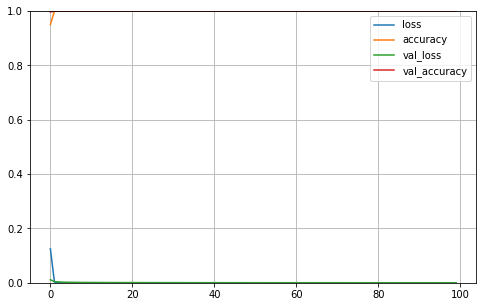

In [137]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [58]:
# y_pred
# .info()

unique, counts = np.unique(y, return_counts=True)
dict(zip(unique, counts))

{0: 3170, 1: 2316}

In [91]:
# X_train
# .values
class_names

['Highly Engaged', 'Moderately Engaged']

In [140]:
from sklearn.metrics import confusion_matrix


X_new = X_test
y_pred = np.round(model.predict(X_new))

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[783   0]
 [  1 801]]


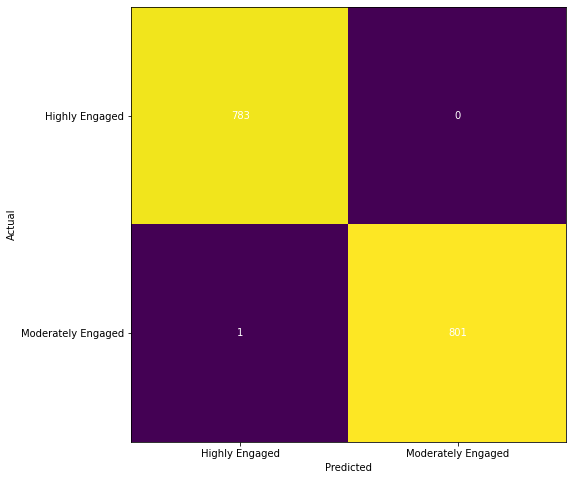

In [141]:
fig, ax = plt.subplots(figsize=(8, 8))
ax.imshow(cm)
ax.grid(False)
ax.xaxis.set(ticks=(0, 1), ticklabels=class_names)
ax.yaxis.set(ticks=(0, 1), ticklabels=class_names)
ax.set_ylim(1.5, -0.5)
for i in range(2):
    for j in range(2):
        ax.text(j, i, cm[i, j], ha='center', va='center', color='white')
plt.xlabel('Predicted')
plt.ylabel('Actual')
plt.show()

### Remove unrelevant feature

In [212]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 5636 entries, 0 to 5635
Data columns (total 21 columns):
 #   Column              Non-Null Count  Dtype
---  ------              --------------  -----
 0   Divisi              5636 non-null   int64
 1   Company             5636 non-null   int64
 2   BP                  5636 non-null   int64
 3   Level Company       5636 non-null   int64
 4   CFU FU Outdated     5636 non-null   int64
 5   CFU FU              5636 non-null   int64
 6   HCBP                5636 non-null   int64
 7   Umur                5636 non-null   int64
 8   Durasi Kerja        5636 non-null   int64
 9   Generasi            5636 non-null   int64
 10  Jenis Kelamin       5636 non-null   int64
 11  PSA                 5636 non-null   int64
 12  Pulau               5636 non-null   int64
 13  Level Engagement 2  5636 non-null   int64
 14  Agama               5636 non-null   int64
 15  Marital             5636 non-null   int64
 16  Employee Group      5636 non-null   int64


In [214]:
pd.set_option('display.max_columns', None) # Display all columns
df.corrwith(df['Level Engagement 2']).sort_values(ascending=False)

Level Engagement 2    1.000000
Generasi              0.216202
Marital               0.147446
Jenis Kelamin         0.122056
Employee Group        0.023122
Company               0.022681
Agama                 0.004871
Short Job Family     -0.010387
CFU FU Outdated      -0.023780
HCBP                 -0.026899
Short Job Function   -0.027149
CFU FU               -0.027340
Employee Subgroup    -0.039365
Divisi               -0.044267
Pulau                -0.063585
PSA                  -0.068868
Level Pendidikan     -0.076768
Level Company        -0.106978
BP                   -0.107026
Umur                 -0.135823
Durasi Kerja         -0.217654
dtype: float64

In [185]:
# df = df.drop(df.columns[13:61], axis=1) #drop survey
df = df.drop(df.columns[14:31], axis=1) #drop survey 2

In [83]:
# selected_col_val

In [215]:
y = df['Level Engagement 2']
y

0       0
1       1
2       1
3       2
4       1
       ..
5631    0
5632    1
5633    1
5634    0
5635    0
Name: Level Engagement 2, Length: 5636, dtype: int64

In [216]:
X = df
X = X.drop(['Level Engagement 2'], axis=1)
X = X.values
X

array([[ 0,  0,  0, ...,  0,  0,  0],
       [ 1,  1,  0, ...,  1,  1,  1],
       [ 2,  2,  1, ...,  1,  0,  0],
       ...,
       [60,  5,  3, ...,  1, 12,  2],
       [ 2,  2,  0, ...,  3,  0,  0],
       [60,  5,  5, ...,  2, 12,  2]], dtype=int64)

In [190]:
X.shape

(5636, 20)

In [217]:
# separate minority and majority classes
highly_engaged = df[df['Level Engagement 2']==0]
moderately_engaged = df[df['Level Engagement 2']==1]

# Get a class count to understand the class imbalance.
print('Highly Engaged count: '+ str(len(highly_engaged)))
print('Moderately Engaged count: '+ str(len(moderately_engaged)))

Highly Engaged count: 3170
Moderately Engaged count: 2316


In [218]:
from sklearn.utils import resample

In [219]:
# upsample minority: alcohol problem
moderately_engaged_upsampled = resample(moderately_engaged,
                          replace=True, # sample with replacement
                          n_samples=len(highly_engaged), # match number in majority class
                          random_state=22) # reproducible results
moderately_engaged_upsampled.shape

(3170, 21)

In [220]:
# combine majority and upsampled minority
upsampled = pd.concat([highly_engaged, moderately_engaged_upsampled])
# upsampled
# check new class counts
upsampled['Level Engagement 2'].value_counts()

1    3170
0    3170
Name: Level Engagement 2, dtype: int64

In [221]:
y_train_up = upsampled['Level Engagement 2']
X_train_up = upsampled.drop(columns = 'Level Engagement 2', axis=1)
X_train_up.shape

(6340, 20)

In [222]:
X.shape

(5636, 20)

In [223]:
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler

# Resample
X_train_full, X_test, y_train_full, y_test = train_test_split(X_train_up, y_train_up, random_state=22, test_size=0.15)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22, test_size=0.15)

# X_train_full, X_test, y_train_full, y_test = train_test_split(X, y, random_state=22)
# X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=22)

In [224]:
scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_valid = scaler.transform(X_valid)
X_test = scaler.transform(X_test)

In [225]:
encoder = LabelEncoder()
encoder.fit(y_train)
y_train = encoder.transform(y_train)
y_valid = encoder.transform(y_valid)
y_test = encoder.transform(y_test)

In [207]:
# y_valid.shape
# X_train

In [226]:
# Relevant Feature
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train.shape[1:]),
    keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train, y_train, epochs=100, validation_data=(X_valid, y_valid))
model.evaluate(X_test, y_test)


Epoch 1/100
144/144 [==============================] - 2s 6ms/step - loss: 0.6613 - accuracy: 0.6172 - val_loss: 0.6368 - val_accuracy: 0.6465
Epoch 2/100
144/144 [==============================] - 1s 5ms/step - loss: 0.6137 - accuracy: 0.6714 - val_loss: 0.6338 - val_accuracy: 0.6638
Epoch 3/100
144/144 [==============================] - 1s 5ms/step - loss: 0.5916 - accuracy: 0.6990 - val_loss: 0.6253 - val_accuracy: 0.6502
Epoch 4/100
144/144 [==============================] - 1s 8ms/step - loss: 0.5861 - accuracy: 0.6979 - val_loss: 0.6319 - val_accuracy: 0.6465
Epoch 5/100
144/144 [==============================] - 1s 10ms/step - loss: 0.5750 - accuracy: 0.7079 - val_loss: 0.6387 - val_accuracy: 0.6477
Epoch 6/100
144/144 [==============================] - 1s 10ms/step - loss: 0.5632 - accuracy: 0.7197 - val_loss: 0.6651 - val_accuracy: 0.6354
Epoch 7/100
144/144 [==============================] - 1s 10ms/step - loss: 0.5612 - accuracy: 0.7149 - val_loss: 0.6277 - val_accuracy: 0.6

Epoch 58/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1542 - accuracy: 0.9438 - val_loss: 1.3994 - val_accuracy: 0.6984
Epoch 59/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1164 - accuracy: 0.9538 - val_loss: 1.4356 - val_accuracy: 0.7070
Epoch 60/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1144 - accuracy: 0.9542 - val_loss: 1.4773 - val_accuracy: 0.6836
Epoch 61/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1085 - accuracy: 0.9551 - val_loss: 1.4631 - val_accuracy: 0.7194
Epoch 62/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1060 - accuracy: 0.9589 - val_loss: 1.4925 - val_accuracy: 0.7046
Epoch 63/100
144/144 [==============================] - 1s 9ms/step - loss: 0.1240 - accuracy: 0.9480 - val_loss: 1.5976 - val_accuracy: 0.6972
Epoch 64/100
144/144 [==============================] - 1s 8ms/step - loss: 0.1225 - accuracy: 0.9505 - val_loss: 1.5059 - val_accuracy:

[1.8161344528198242, 0.7171398401260376]

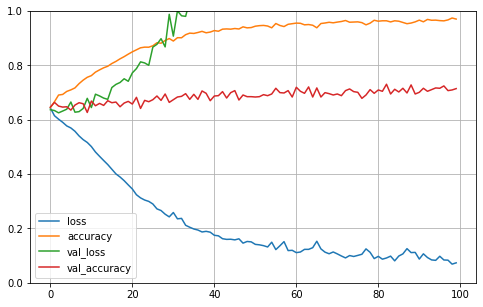

In [227]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

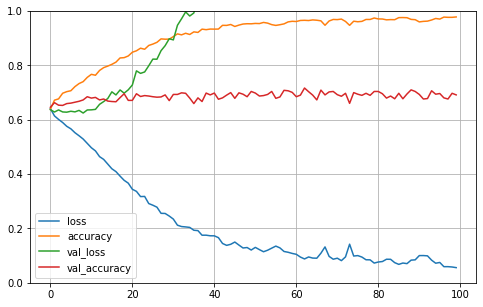

In [202]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

In [203]:
X_new = X_test
y_pred = np.round(model.predict(X_new))

# np.argmax(model.predict(X_new), axis=-1)

cm = confusion_matrix(y_test, y_pred)
print(cm)


[[505 278]
 [209 593]]


In [42]:
X_test.shape

(1585, 13)

In [ ]:
Kenapa Akurasi dan Validasi berbeda jauh: overfit

In [242]:
full_df.Umur.value_counts(ascending=False)
# df.Umur.value_counts(ascending=False)

48.0    292
55.0    280
56.0    278
47.0    248
28.0    229
27.0    220
29.0    217
50.0    214
26.0    206
49.0    205
30.0    187
54.0    184
51.0    182
53.0    175
37.0    170
32.0    167
52.0    165
25.0    152
35.0    149
34.0    143
36.0    141
38.0    140
31.0    136
39.0    134
41.0    128
33.0    125
46.0    122
40.0    120
43.0    118
44.0     96
42.0     95
45.0     90
24.0     76
22.0     17
23.0     14
21.0      7
58.0      5
57.0      4
59.0      2
60.0      1
64.0      1
62.0      1
Name: Umur, dtype: int64

### Try best fitur

In [208]:
from sklearn.feature_selection import SelectKBest, f_classif
selector = SelectKBest(f_classif, k=10)
selector_valid = SelectKBest(f_classif, k=10)

#Fitting selector object to training set
selector.fit(X_train, y_train)

selected_columns = X_train.columns[selector.get_support()]
removed_columns = X_train.columns[~selector.get_support()]

#Fitting selector object to validation set
selector_valid.fit(X_valid, y_valid)

selected_col_val = X_valid.columns[selector_valid.get_support()]
removed_col_val = X_valid.columns[~selector_valid.get_support()]


X_train_kbest = X_train[selected_columns]
X_test_kbest = X_test[selected_columns]
print(X_train_kbest.shape, X_test_kbest.shape)

X_valid_kbest = X_valid[selected_col_val]
print(X_valid_kbest.shape)

(3566, 10) (1585, 10)
(1189, 10)


In [209]:
selected_col_val

Index(['Company', 'BP', 'Level Company', 'Umur', 'Durasi Kerja', 'Generasi',
       'Jenis Kelamin', 'Marital', 'Employee Group', 'Level Pendidikan'],
      dtype='object')

In [210]:
# Best Feature
model = keras.models.Sequential([
    keras.layers.Dense(300, activation="relu", input_shape=X_train_kbest.shape[1:]),
#     keras.layers.Dense(50, activation='relu'),
    keras.layers.Dense(25, activation='relu'),
    keras.layers.Dense(1, activation='sigmoid')
])

# model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(lr=1e-3), metrics=["accuracy"])

model.compile(
    loss= tf.keras.losses.binary_crossentropy,
    optimizer=tf.keras.optimizers.Adam(),
    metrics=['accuracy']
)

history = model.fit(X_train_kbest, y_train, epochs=100, validation_data=(X_valid_kbest, y_valid))
model.evaluate(X_test_kbest, y_test)


Epoch 1/100
112/112 [==============================] - 1s 6ms/step - loss: 0.8733 - accuracy: 0.5299 - val_loss: 2.0731 - val_accuracy: 0.5139
Epoch 2/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6695 - accuracy: 0.6305 - val_loss: 2.4348 - val_accuracy: 0.5029
Epoch 3/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6500 - accuracy: 0.6309 - val_loss: 2.9165 - val_accuracy: 0.5080
Epoch 4/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6536 - accuracy: 0.6362 - val_loss: 2.8993 - val_accuracy: 0.4987
Epoch 5/100
112/112 [==============================] - 1s 5ms/step - loss: 0.6326 - accuracy: 0.6593 - val_loss: 3.0441 - val_accuracy: 0.5004
Epoch 6/100
112/112 [==============================] - 1s 6ms/step - loss: 0.6376 - accuracy: 0.6486 - val_loss: 2.7612 - val_accuracy: 0.5004
Epoch 7/100
112/112 [==============================] - 1s 9ms/step - loss: 0.6370 - accuracy: 0.6466 - val_loss: 2.9438 - val_accuracy: 0.5004

Epoch 58/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5801 - accuracy: 0.6839 - val_loss: 7.5274 - val_accuracy: 0.5122
Epoch 59/100
112/112 [==============================] - 1s 8ms/step - loss: 0.5744 - accuracy: 0.6929 - val_loss: 7.1181 - val_accuracy: 0.5257
Epoch 60/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5685 - accuracy: 0.6904 - val_loss: 8.2283 - val_accuracy: 0.5029
Epoch 61/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5716 - accuracy: 0.6975 - val_loss: 8.4241 - val_accuracy: 0.5021
Epoch 62/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5728 - accuracy: 0.6912 - val_loss: 7.7005 - val_accuracy: 0.5147
Epoch 63/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5711 - accuracy: 0.6887 - val_loss: 8.6418 - val_accuracy: 0.5046
Epoch 64/100
112/112 [==============================] - 1s 9ms/step - loss: 0.5570 - accuracy: 0.7136 - val_loss: 8.5936 - val_accuracy:

[0.6562334299087524, 0.6605678200721741]

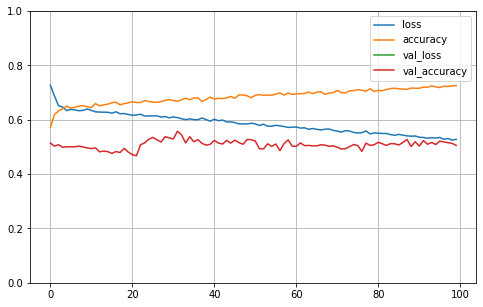

In [211]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()

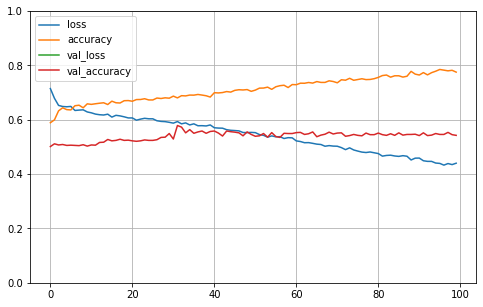

In [78]:
pd.DataFrame(history.history).plot(figsize=(8, 5))
plt.grid(True)
plt.gca().set_ylim(0, 1)
plt.show()